## Problem Description

Bintik matahari (sunspot) adalah bagian dari permukaan matahari yang dipengaruhi aktivitas
magnetis yang mengakibatkan terhambatnya konveksi sehingga bersuhu lebih dingin dan
tampak jelas sebagai noda hitam. Bintik-bintik ini bisa diamati dari bumi tanpa bantuan
teleskop. Jumlah bintik Matahari bergantung pada siklus Matahari dengan durasi sekitar ~11
tahun. Data pengamatan aktivitas sunspot dari tahun 1900 hingga 2023 diberikan pada
sunspot19002023.csv. Dari data pengamatan tersebut saya akan mencoba melakukan analaisis dengan algoritma DFT
atau FFT. </br>

1. **Data Exploration**

In [523]:
import pandas as pd

sunspot = pd.read_csv('sunspot19002023.csv', header = None)
sunspot.head()

,0,1
0,1901,8.1
1,1901,7.3
2,1901,6.5
3,1901,5.4
4,1901,4.7


In [524]:
# Kita beri nama kolom

column = ['Years', 'Number of Spots']
sunspot.columns = column
sunspot.head()

,Years,Number of Spots
0,1901,8.1
1,1901,7.3
2,1901,6.5
3,1901,5.4
4,1901,4.7


In [525]:
#Kita lihat informasi dari data

sunspot.describe()

,Years,Number of Spots
count,1466.000000,1466.000000
mean,1961.583902,85.428990
std,35.278320,66.315148
min,1901.000000,1.800000
25%,1931.000000,26.200000
50%,1962.000000,76.250000
75%,1992.000000,127.050000
max,2023.000000,285.000000


In [526]:
sunspot.var()

Years              1244.559850
Number of Spots    4397.698852
dtype: float64

Maka kita mendapatkan informasi untuk nilai terendah, nilai tertinggi, rata-rata, standar deviasi, dan variansi aktivitas sunspot setiap tahun.

| No |      Kolom      | Nilai Terendah | Nilai Tertinggi |  Rata-Rata  | Standar Deviasi (s) | Varians (s^2) |
|:--:|:---------------:|:--------------:|:---------------:|:-----------:|:-------------------:|:-------------:|
|  1 |      Years      |      1901      |       2023      | 1961.583902 |      35.278320      |  1244.559850  |
|  2 | Number of Spots |       1.8      |       285       |  85.428990  |      66.315148      |  4397.698852  |

Kita plotting data untuk melihat bentuk data

Text(0.5, 1.0, 'Grafik perbandingan Number of Spots vs Years')

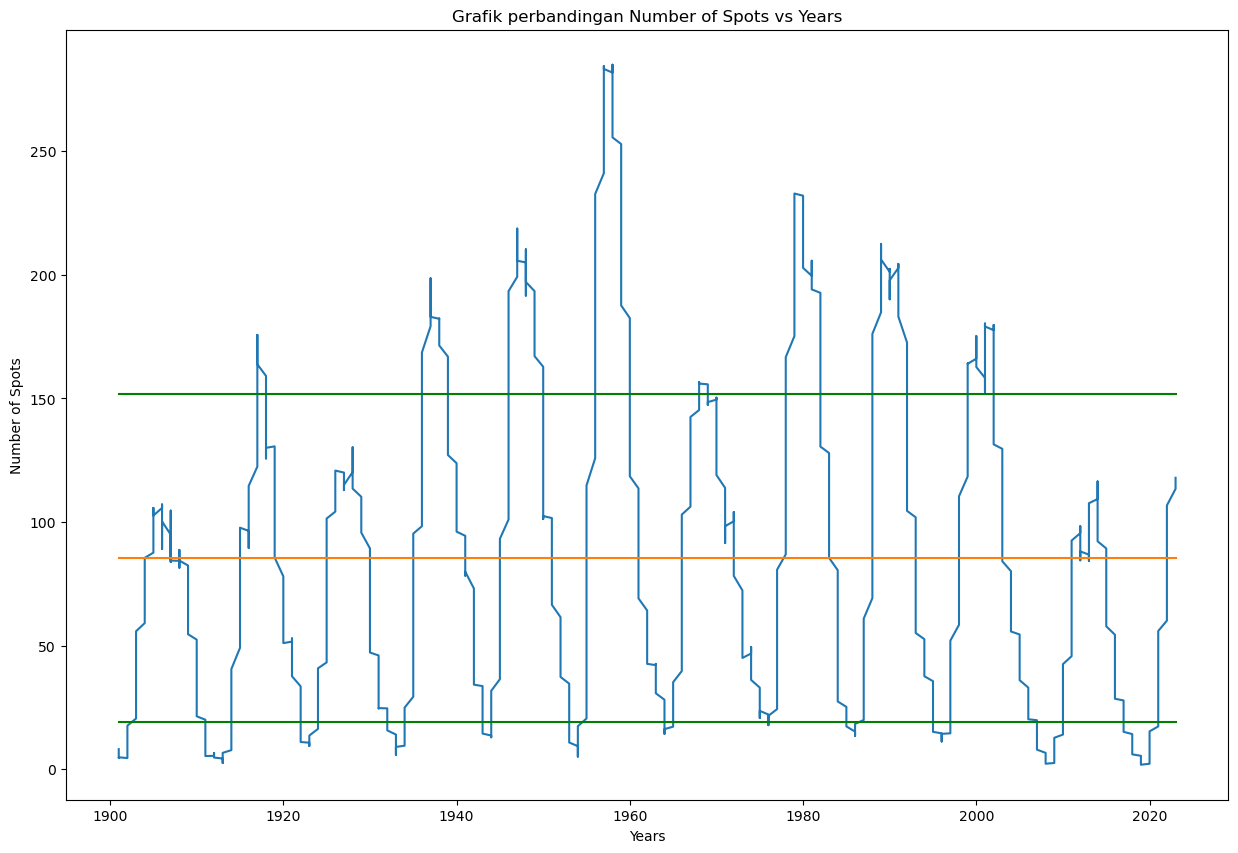

In [527]:
#Kita plotting data
import matplotlib.pyplot as plt

x = sunspot['Years'].to_numpy()
y = sunspot['Number of Spots'].to_numpy()
meanx = [1901, 2023]
meany = [85.428990,85.428990]
stdx1 = [1901, 2023]
stdy1 = [85.428990 + 66.315148, 85.428990 + 66.315148]
stdx2 = [1901, 2023]
stdy2 = [85.428990 - 66.315148, 85.428990 - 66.315148]

plt.figure(figsize=(15,10))
plt.plot(x,y)
plt.plot(meanx, meany)
plt.plot(stdx1, stdy1, c='g')
plt.plot(stdx2, stdy2, c='g')
plt.xlabel('Years')
plt.ylabel('Number of Spots')
plt.title("Grafik perbandingan Number of Spots vs Years")


>> b. Analisis 


Dari data tersebut kita dapatkan nilai untuk number of spots yaitu 85.428990. Dapat kita lihat juga nilai standar deviasi yaitu 66.314148 yang berarti jauh nilai dari number of spots mulai dari -66.314148 hingga 66.314148 ditinjau dari nilai rata-rata  number of spots (standar deviasi = seberapa jauh nilai data dari rata-rata sampel atau populasi). Dapat kita lihat juga nilai varians untuk number of spots yaitu 4397.698852 yang berarti menunjukan besarnya perbedaan rata rata antara setiap nilai dalam kumpulan data (variansi = perbedaan rata-rata antara setiap nilai dalam data).Dari grafik  terlihat garis orange menunjukan nilai rata-rata dari data. Standar deviasi terlihat garis berwarna hijau, menunjukan jauhnya nilai dari garis berwarna orange, sedangkan varians membandingkan perbedaan nilai rata-rata dari data. nilai-nilai yang tercakup dalam range standar deviasi dianggap normal, sedangkan apabila melebihi dianggap ekstrim tinggi dan apabila dibawahnya dianggap ekstrim rendah atau biasa disebut sebagai outlier. Karena gelombang yang kita amati bersifat diskrit, maka kita dapat melihat grafik dalam bentuk visualisasi terhadap frekuensi maupun periode. 

2. **Visualisasi Data**

>> a. Plot data sunspot19002023.csv pada grafik *jumlah_sunspot vs bulan*

In [528]:
#Tampilkan data
sunspot.head(25)

,Years,Number of Spots
0,1901,8.1
1,1901,7.3
2,1901,6.5
3,1901,5.4
4,1901,4.7
5,1901,4.6
6,1901,5.0
7,1901,5.2
8,1901,5.5
9,1901,6.1


Pada setiap tahunnya merepresentasikan data pada tiap bulannya sehingga dapat kita masukan nilai ke dalam column.

In [529]:
length = sunspot['Number of Spots'].to_numpy()
month = list(range(1, 13)) * (len(length) // 12) + list(range(1, len(length) % 12 + 1))
sunspot['Month'] = month

sunspot

,Years,Number of Spots,Month
0,1901,8.1,1
1,1901,7.3,2
2,1901,6.5,3
3,1901,5.4,4
4,1901,4.7,5
...,...,...,...
1461,2022,98.9,10
1462,2022,101.1,11
1463,2022,106.7,12
1464,2023,113.4,1


Kita cek nilai maksimal dari _Number of Spots_

In [530]:
sunspot.max()

Years              2023.0
Number of Spots     285.0
Month                12.0
dtype: float64

In [531]:
sunspotwhere = sunspot.sort_values("Number of Spots")
sunspotwhere

,Years,Number of Spots,Month
1427,2019,1.8,12
1426,2019,2.0,11
1428,2020,2.2,1
1295,2008,2.2,12
1294,2008,2.3,11
...,...,...,...
681,1957,282.5,10
683,1957,283.3,12
682,1957,284.4,11
685,1958,284.5,2


Kita plotting grafik

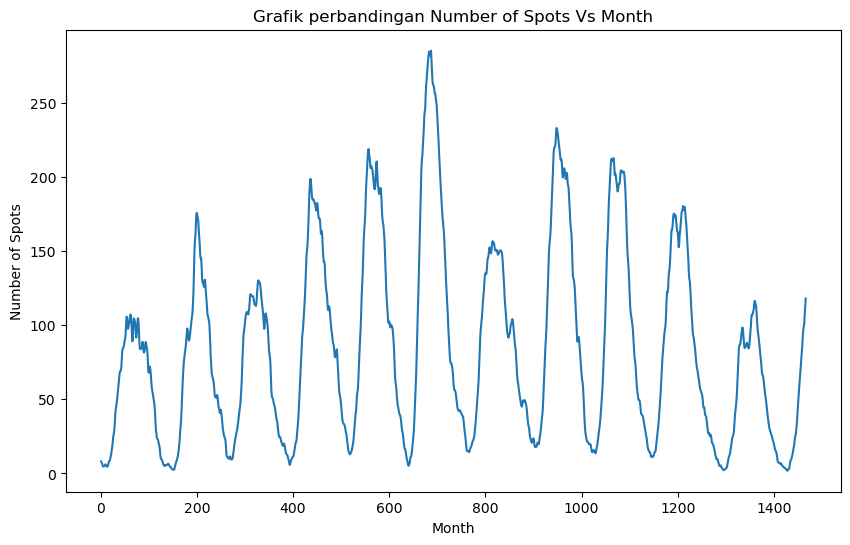

In [532]:
import numpy as np

x = np.arange(1, len(sunspot['Month'])+1, 1)
y = sunspot['Number of Spots'].to_numpy()

plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.xlabel('Month')
plt.ylabel('Number of Spots')
plt.title('Grafik perbandingan Number of Spots Vs Month')
plt.show()

>> b. Analisis grafik

Dari grafik perbandingan tersebut menunjukan perbandingan _Number of Spots_ dengan setiap _Month_. Terlihat pada bulan bulan tertentu _Number of Spots_ meningkat di antara bulan lainnya. _Number of Spots_ tertinggi bernilai 285 bintik per bulan terjadi pada Bulan 3 (Maret) tahun 1958. _Number of Spots_ menunjukan pola yang beraturan dengan frekuensi yang cukup tinggi bila dilihat pada gambar. 

3. **Analisis Fourier**

>> a. Kita coba melakukan transformasi data dari domain waktu ke domain frekuensi menggunakan teknik FFT. Kemudian melakukan plot grafik koefisien Fourier vs frekuensi (f) dan terhadap periode (T).

In [533]:
sunspot

,Years,Number of Spots,Month
0,1901,8.1,1
1,1901,7.3,2
2,1901,6.5,3
3,1901,5.4,4
4,1901,4.7,5
...,...,...,...
1461,2022,98.9,10
1462,2022,101.1,11
1463,2022,106.7,12
1464,2023,113.4,1


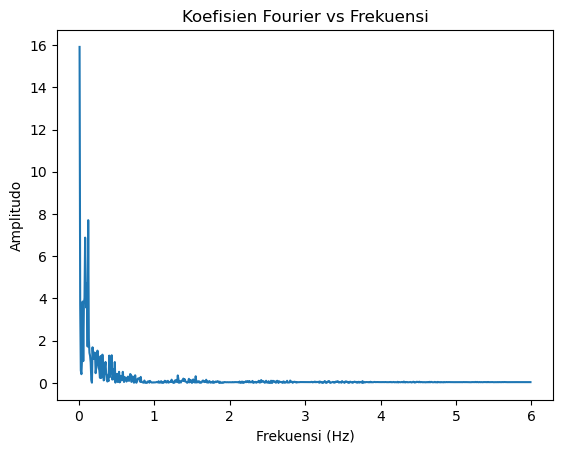

In [534]:
from scipy.fft import fft, fftfreq, fftshift
import numpy as np

x = np.arange(1, len(sunspot['Month']), 1)
y = sunspot['Number of Spots'].to_numpy()
N = len(x)
T = 1.0 / 12.0
#Search fft value

coef = fft(y)
freq = np.fft.rfftfreq(N, 1/12) [1:N//2]
realcoef = np.abs(np.real(coef)) [1:N//2]/N

#plotting
plt.title('Koefisien Fourier vs Frekuensi')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.plot(freq, np.abs(realcoef))
plt.show()

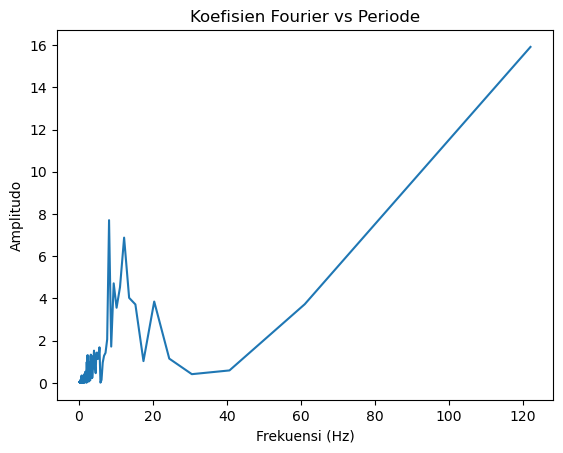

In [535]:
#terhadap periode
plt.title('Koefisien Fourier vs Periode')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.plot(1/freq, np.abs(realcoef))
plt.show()

>> b. Dari hasil di atas, </br>
>> i. pada tahun berapa aktivitas sunspot paling tinggi dan paling rendah? </br>
>> ii. berapakah periode aktivitas sunspot?

In [536]:
xf_full = fftfreq(len(sunspot['Number of Spots']), T)

df = pd.DataFrame({
    'Frekuensi (f)': xf_full,
    'Koefisien Fourier (Real)': coef.real,
    'Koefisien Fourier (Imaginer)': coef.imag,
    'Magnitudo': np.abs(yf)
})

styled_df = df.style.format({
    'Frekuensi (f)': '{:.4f}',
    'Koefisien Fourier (Real)': '{:.4f}',
    'Koefisien Fourier (Imaginer)': '{:.4f}',
    'Magnitudo': '{:.4f}'
})

styled_df

,Frekuensi (f),Koefisien Fourier (Real),Koefisien Fourier (Imaginer),Magnitudo
0,0.0000,125238.9000,-0.0000,125238.9000
1,0.0082,-23309.5439,3231.0642,23532.4162
2,0.0164,-5459.8931,2004.2877,5816.1501
3,0.0246,-867.3100,-10357.3095,10393.5599
4,0.0327,-608.1594,2565.3267,2636.4292
5,0.0409,-1686.7859,-3949.7841,4294.8854
6,0.0491,5645.9560,4206.8829,7040.9291
7,0.0573,-1514.2629,-3418.3657,3738.7453
8,0.0655,-5445.8085,-1036.3225,5543.5363
9,0.0737,-5903.8381,-8648.9441,10471.8451


i. aktivitas sunspot paling tinggi

In [537]:
yvalue = sunspot['Number of Spots'].values
xvalue = np.arange(len(yvalue))

high_index = np.argmax(yvalue)
low_index = np.argmin(yvalue)

nilai_tinggi = yvalue[high_index]
nilai_rendah = yvalue[low_index]

tahun_awal = 1901
tahun_tinggi = tahun_awal + high_index // 12
bulan_tinggi = (high_index % 12) + 1
tahun_rendah = tahun_awal + low_index // 12
bulan_rendah = (low_index % 12) + 1

print(f"Aktivitas sunspot paling tinggi adalah pada tahun {tahun_tinggi}, bulan ke-{bulan_tinggi} dengan nilai {nilai_tinggi}")
print(f"Aktivitas sunspot paling tinggi adalah pada tahun {tahun_rendah}, bulan ke-{bulan_rendah} dengan nilai {nilai_rendah}")

Aktivitas sunspot paling tinggi adalah pada tahun 1958, bulan ke-3 dengan nilai 285.0
Aktivitas sunspot paling tinggi adalah pada tahun 2019, bulan ke-12 dengan nilai 1.8


In [538]:
period_index = np.argmax(2.0/N * np.abs(coef[1:N//2]))
period_dominan = 1/xf[period_index]

print(f"Periode aktivitas sunspot adalah kurang lebih {period_dominan:.2f} tahun")

Periode aktivitas sunspot adalah kurang lebih 11.11 tahun


>> Mencoba melakukan invers FFT

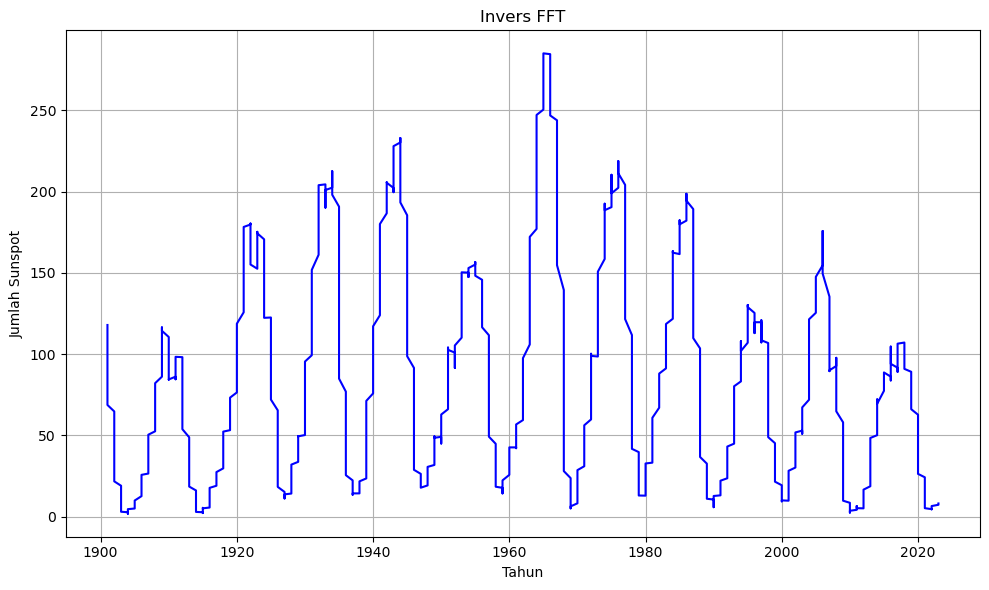

In [539]:
from scipy.fft import fft, ifft
import numpy as np
import matplotlib.pyplot as plt

y_values = sunspot['Number of Spots'].values
x_values = sunspot['Years']

yf = fft(y_values)
y_inv = ifft(yf)

plt.figure(figsize=(10, 6))
plt.plot(x_values[::-1], y_inv.real, 'b-')
plt.title('Invers FFT')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Sunspot')
plt.grid()

plt.tight_layout()
plt.show()

>> D. Analisis dan Kesimpulan Akhir

Dari grafik diatas terlihat bahwa grafik fungsi sunspot disusun oleh beberapa frekuensi. Frekuensi penyusun grafik ditunjukan oleh 'Koefisien Fourier vs Frekuensi'. Amplitudo menunjukan nilai transformasi fourier, sehingga dapat disimpulkan bahwa transformasi fourier dapat menunjukan penyusun frekuensi dari suatu gelombang yang ada. Dari perhitungan diatas ditemukan aktivitas sunspot paling tinggi pada tahun 1958 dan terendah pada tahun 2019, dan siklus untuk terjadinya 1 kali aktivitas sunspot adalah 11.11 tahun. 